In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import ElasticNet
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer


In [ ]:
df_train = pd.read_csv("/content/drive/MyDrive/Github/Doğrusal Regresyon/train.csv", dtype={"StateHoliday": str}) #eğitim yapılacak veri seti
df_train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
df_train.isnull().values.any()

False

In [ ]:
df_train.isnull().sum()

,0
Store,0
DayOfWeek,0
Date,0
Sales,0
Customers,0
Open,0
Promo,0
StateHoliday,0
SchoolHoliday,0


In [ ]:
print(df_train.dtypes)


Store             int64
DayOfWeek         int64
Date             object
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday     object
SchoolHoliday     int64
dtype: object


In [ ]:
print(df_train['StateHoliday'].unique())


['0' 'a' 'b' 'c']


In [ ]:
state_holiday_map = {
    '0': 0,
    'a': 1,
    'b': 2,
    'c': 3
}
df_train['StateHoliday'] = df_train['StateHoliday'].map(state_holiday_map)

df_train['StateHoliday'] = df_train['StateHoliday'].astype(int)

print(df_train.dtypes)

Store             int64
DayOfWeek         int64
Date             object
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday      int64
SchoolHoliday     int64
dtype: object


In [ ]:
df_train['Date'] = pd.to_datetime(df_train['Date'])

df_train['Date'] = df_train['Date'].dt.strftime('%Y%m%d').astype(int)

print(df_train.dtypes)


Store            int64
DayOfWeek        int64
Date             int64
Sales            int64
Customers        int64
Open             int64
Promo            int64
StateHoliday     int64
SchoolHoliday    int64
dtype: object


In [ ]:
df_test = pd.read_csv("/content/drive/MyDrive/Github/Doğrusal Regresyon/test.csv") #test veri seti
df_test.head(10)

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
5,6,10,4,2015-09-17,1.0,1,0,0
6,7,11,4,2015-09-17,1.0,1,0,0
7,8,12,4,2015-09-17,1.0,1,0,0
8,9,13,4,2015-09-17,1.0,1,0,0
9,10,14,4,2015-09-17,1.0,1,0,0


In [ ]:
df_test.isnull().values.any()

True

In [ ]:
df_test.isnull().sum()

,0
Id,0
Store,0
DayOfWeek,0
Date,0
Open,11
Promo,0
StateHoliday,0
SchoolHoliday,0


In [ ]:
mean_open = df_test['Open'].mean()

df_test['Open'] = df_test['Open'].fillna(mean_open)

print(df_test.isnull().sum())

Id               0
Store            0
DayOfWeek        0
Date             0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64


In [ ]:
print(df_test.dtypes)


Id                 int64
Store              int64
DayOfWeek          int64
Date              object
Open             float64
Promo              int64
StateHoliday      object
SchoolHoliday      int64
dtype: object


In [ ]:
state_holiday_map = {
    '0': 0,
    'a': 1,
    'b': 2,
    'c': 3
}
df_test['StateHoliday'] = df_test['StateHoliday'].map(state_holiday_map)

df_test['StateHoliday'] = df_test['StateHoliday'].astype(int)

print(df_test.dtypes)

Id                 int64
Store              int64
DayOfWeek          int64
Date              object
Open             float64
Promo              int64
StateHoliday       int64
SchoolHoliday      int64
dtype: object


In [ ]:
df_test['Date'] = pd.to_datetime(df_test['Date'])

df_test['Date'] = df_test['Date'].dt.strftime('%Y%m%d').astype(int)

print(df_test.dtypes)

Id                 int64
Store              int64
DayOfWeek          int64
Date               int64
Open             float64
Promo              int64
StateHoliday       int64
SchoolHoliday      int64
dtype: object


In [ ]:
print(df_test['Open'].unique())


[1.         0.85432237 0.        ]


In [ ]:
df_test['Open'] = df_test['Open'].apply(lambda x: 1 if x > 0 else 0).astype(int)

print(df_test.dtypes)

Id               int64
Store            int64
DayOfWeek        int64
Date             int64
Open             int64
Promo            int64
StateHoliday     int64
SchoolHoliday    int64
dtype: object


In [ ]:
df_val = pd.read_csv("/content/drive/MyDrive/Github/Doğrusal Regresyon/store.csv")

In [ ]:
print(df_val.dtypes)


Store                          int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object


In [ ]:
df_val.isnull().sum()

,0
Store,0
StoreType,0
Assortment,0
CompetitionDistance,3
CompetitionOpenSinceMonth,354
CompetitionOpenSinceYear,354
Promo2,0
Promo2SinceWeek,544
Promo2SinceYear,544
PromoInterval,544


In [ ]:
df_train = df_train.merge(df_val, on='Store', how='left', suffixes=('_train', '_val'))

df_test = df_test.merge(df_val, on='Store', how='left', suffixes=('_test', '_val'))

X_train = df_train.drop(['Sales'], axis=1)
y_train = df_train['Sales']

X_test = df_test.drop(['Id'], axis=1)

X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

X_train, X_val = X_train.align(X_val, join='left', axis=1, fill_value=0)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [ ]:
print(f"X_train NaN sayısı: {np.isnan(X_train).sum()}")
print(f"X_val NaN sayısı: {np.isnan(X_val).sum()}")

imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_val = imputer.transform(X_val)
X_test = imputer.transform(X_test)

print(f"X_train NaN sayısı: {np.isnan(X_train).sum()}")
print(f"X_val NaN sayısı: {np.isnan(X_val).sum()}")

elastic_net = ElasticNet()

param_grid = {
    'alpha': [0.1, 1, 10],
    'l1_ratio': [0.1, 0.5, 0.9]
}

X_train NaN sayısı: 1331789
X_val NaN sayısı: 333611
X_train NaN sayısı: 0
X_val NaN sayısı: 0


In [ ]:
grid_search = GridSearchCV(estimator=elastic_net, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 1, 10], 'l1_ratio': [0.1, 0.5, 0.9]})

In [ ]:
best_model = grid_search.best_estimator_
print(f'En iyi parametreler: {grid_search.best_params_}')

En iyi parametreler: {'alpha': 0.1, 'l1_ratio': 0.9}


In [ ]:
y_pred = best_model.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print(f'MSE: {mse}')
print(f'R²: {r2}')

MSE: 1495332.361719179
R²: 0.8988874858821122


In [ ]:
predictions = best_model.predict(X_test)

df_results = pd.DataFrame({
    'Id': df_test['Id'],
    'Sales': predictions
})
df_results.to_csv("/content/drive/MyDrive/Github/Doğrusal Regresyon/predictions.csv", index=False)

print("Tahminler kaydedildi.")

Tahminler kaydedildi.


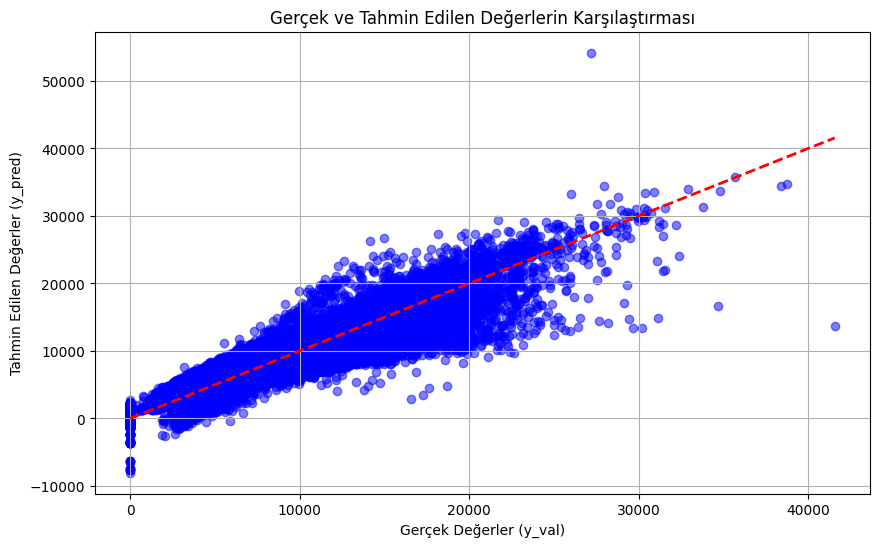

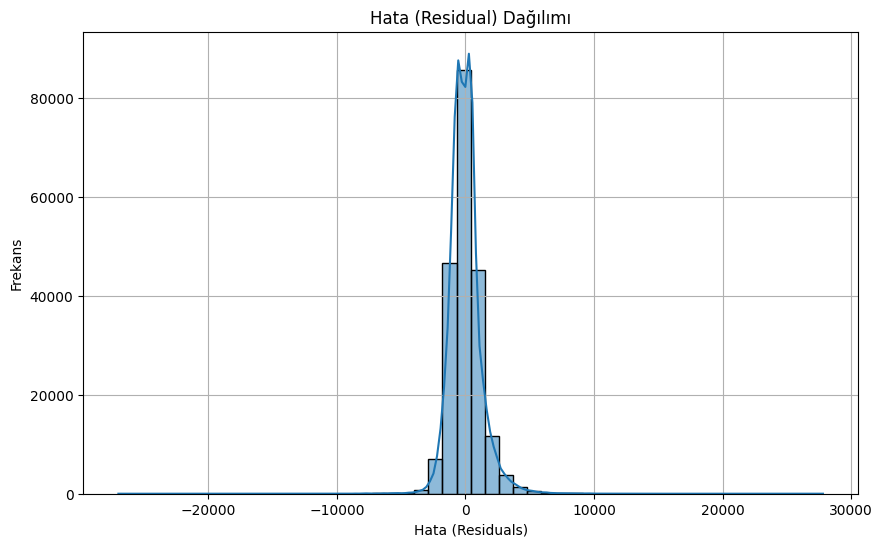

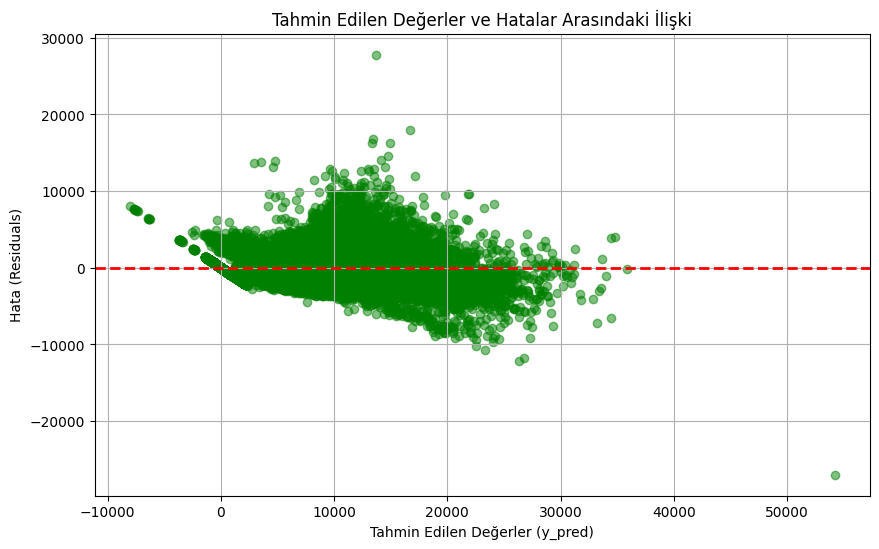

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_pred, color='blue', alpha=0.5)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], color='red', linestyle='--', lw=2)
plt.title('Gerçek ve Tahmin Edilen Değerlerin Karşılaştırması')
plt.xlabel('Gerçek Değerler (y_val)')
plt.ylabel('Tahmin Edilen Değerler (y_pred)')
plt.grid(True)
plt.show()

residuals = y_val - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=50, kde=True)
plt.title('Hata (Residual) Dağılımı')
plt.xlabel('Hata (Residuals)')
plt.ylabel('Frekans')
plt.grid(True)
plt.show()

# Hataların scatter plot ile gösterimi
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='green', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--', lw=2)
plt.title('Tahmin Edilen Değerler ve Hatalar Arasındaki İlişki')
plt.xlabel('Tahmin Edilen Değerler (y_pred)')
plt.ylabel('Hata (Residuals)')
plt.grid(True)
plt.show()
